In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI와무역투자론/Data/default_credit_card.csv')
df
#pd.options.display.max_columns=50

,Cust_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# predicators & target
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
label = ['default_YN']

In [7]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.25, random_state=365)
X_train
#y_train

,default_YN
6727,0
29219,0
29528,0
1217,0
11889,0
...,...
8620,0
13147,0
4897,0
2740,0


## Ensemble 모델 - Bagging 호출

In [8]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [9]:
# Bagging
#clf_bagging = BaggingClassifier(SVC(kernel='rbf',C=10, degree=3)).fit(X_train_pre, y_train)

# RandomForest
clf_rf = RandomForestClassifier(n_estimators=100,   # the number of weak learner
                                bootstrap=True,    # bootstrap sampling
                                criterion='entropy',
                                max_depth=3,
                                min_samples_leaf=8,
                                max_samples=0.6    # sub_set sample size
                               )

rf_model=clf_rf.fit(X_train, y_train)

<ipython-input-9-341a07e17123>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model=clf_rf.fit(X_train, y_train)


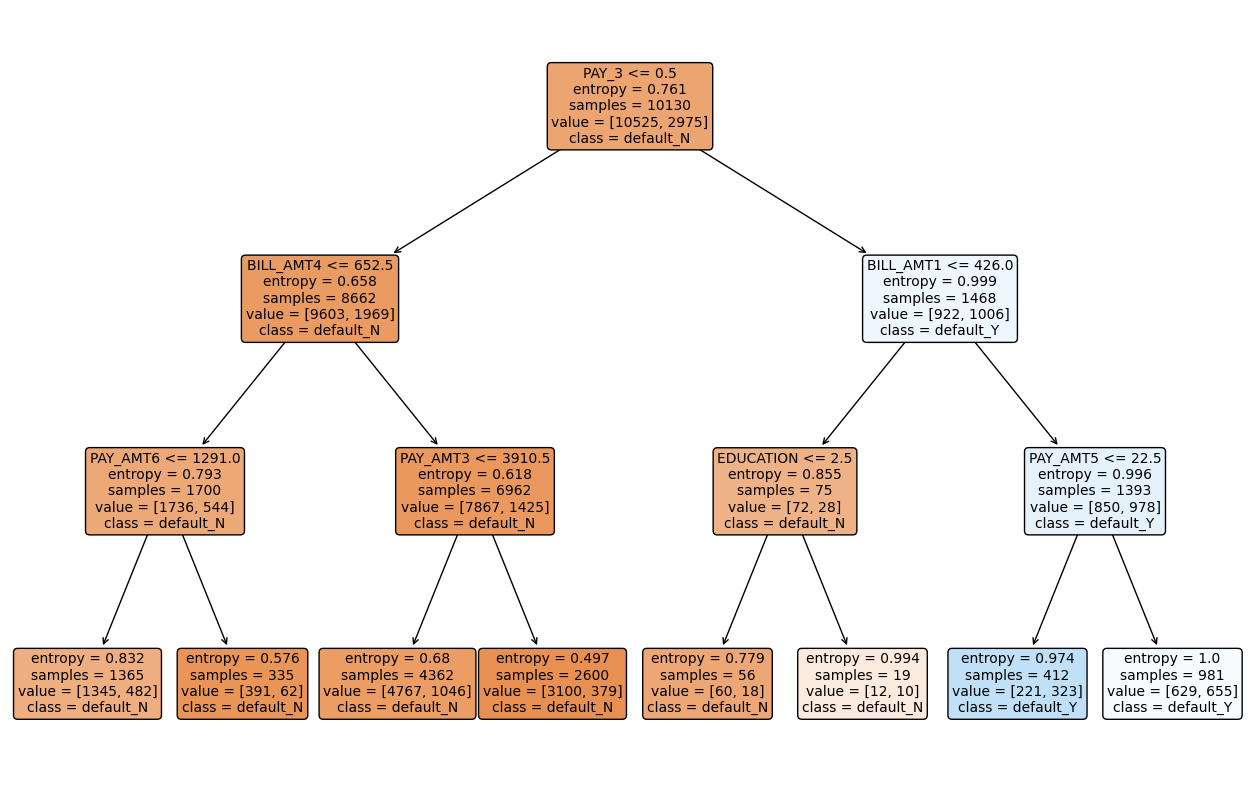

In [11]:

from sklearn.tree import plot_tree # to draw a classification tree

plt.figure(figsize=(16,10))
plot_tree(rf_model.estimators_[0],
          filled=True,
          rounded=True,
          proportion=False,
          class_names=["default_N","default_Y"],
          fontsize=10,
          feature_names=features)
plt.show()